# 자연어처리+딥러닝

## 텍스트와 토큰화

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.utils import to_categorical
from numpy import array
from tensorflow.keras.preprocessing.text import text_to_word_sequence

text = '텍스트에 대해서 전처리를 합니다.'

# 해당 텍스트를 토큰화합니다.
result = text_to_word_sequence(text)
print(text)
print(result)

텍스트에 대해서 전처리를 합니다.
['텍스트에', '대해서', '전처리를', '합니다']


In [2]:
docs = ['텍스트에 대해서 전처리를 합니다.',
       '텍스트는 토큰화하는 방식으로 전처리를 합니다.',
       '토큰화된 텍스트는 원핫인코딩을 통해 표현됩니다.',
       ]

token = Tokenizer()             # 토큰화 함수 지정
token.fit_on_texts(docs)       # 토큰화 함수에 문장 적용

#단어 빈도
print(token.word_counts)

# 문장 빈도
print(token.document_count)

#단어의 문장 빈도
print(token.word_docs)

#단어인덱스
print(token.word_index)

OrderedDict([('텍스트에', 1), ('대해서', 1), ('전처리를', 2), ('합니다', 2), ('텍스트는', 2), ('토큰화하는', 1), ('방식으로', 1), ('토큰화된', 1), ('원핫인코딩을', 1), ('통해', 1), ('표현됩니다', 1)])
3
defaultdict(<class 'int'>, {'전처리를': 2, '대해서': 1, '합니다': 2, '텍스트에': 1, '방식으로': 1, '토큰화하는': 1, '텍스트는': 2, '원핫인코딩을': 1, '토큰화된': 1, '통해': 1, '표현됩니다': 1})
{'전처리를': 1, '합니다': 2, '텍스트는': 3, '텍스트에': 4, '대해서': 5, '토큰화하는': 6, '방식으로': 7, '토큰화된': 8, '원핫인코딩을': 9, '통해': 10, '표현됩니다': 11}


## 단어의 원-핫 인코딩

In [3]:
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

{'전처리를': 1, '합니다': 2, '텍스트는': 3, '텍스트에': 4, '대해서': 5, '토큰화하는': 6, '방식으로': 7, '토큰화된': 8, '원핫인코딩을': 9, '통해': 10, '표현됩니다': 11}


In [4]:
x=token.texts_to_sequences(docs)
print(x)

[[4, 5, 1, 2], [3, 6, 7, 1, 2], [8, 3, 9, 10, 11]]


In [5]:
word_size = len(token.word_index) + 1

In [6]:
#이후 원핫인코딩

## 네이버 영화리뷰에 대해 적용

In [7]:
!wget https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch08/ratings_train.txt -O ratings_train.txt

--2024-06-04 00:17:32--  https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch08/ratings_train.txt
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch08/ratings_train.txt [following]
--2024-06-04 00:17:33--  https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch08/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘ratings_train.txt’

ratings_train.txt   100%[===================>]  13.95M  --.-KB/s    in 0.1s    



In [8]:
import pandas as pd
train_df = pd.read_csv('ratings_train.txt', sep='\t')#탭으로 값이 구분된 파일
train_df = train_df.iloc[11300:11700, :]
train_df.label.value_counts()

label
0    208
1    192
Name: count, dtype: int64

In [9]:
docs = list(train_df.document.values)
classes = train_df.label

In [10]:
classes_ohc = to_categorical(classes, 2)
classes_ohc

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [11]:
# 토큰화
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)


{'영화': 1, '정말': 2, '진짜': 3, '이': 4, '너무': 5, '더': 6, '본': 7, '그': 8, '왜': 9, '영화를': 10, '이거': 11, '잘': 12, '영화가': 13, '이런': 14, '아': 15, '좀': 16, '다': 17, '이건': 18, '그냥': 19, '보고': 20, '드라마': 21, '최고의': 22, '참': 23, '것': 24, '있는': 25, '완전': 26, '내': 27, '없는': 28, '내가': 29, '많은': 30, '좋은': 31, '봤는데': 32, 'ㅋㅋ': 33, '작품': 34, '수': 35, '많이': 36, '평점': 37, '이게': 38, 'ㅋ': 39, '안': 40, '하나': 41, '가장': 42, '배우들': 43, '재미있어요': 44, '한': 45, '다시': 46, '무슨': 47, '없다': 48, '재밌게': 49, '영화는': 50, 'ㅎㅎ': 51, '연출': 52, '10점': 53, '같다': 54, '감독': 55, '최고다': 56, '영화입니다': 57, '스토리': 58, 'ㅋㅋㅋ': 59, '만든': 60, '같이': 61, '재미없다': 62, '주는': 63, '모든': 64, '사람들이': 65, '하고': 66, '보는': 67, '진심': 68, '정도': 69, '평점이': 70, '중에': 71, '매우': 72, '만드는': 73, '재밌다': 74, '쓰레기': 75, '감독이': 76, '아무리': 77, '계속': 78, '이야기': 79, '최악의': 80, '아깝다': 81, '재미': 82, '없고': 83, 'ㅡ': 84, '꼭': 85, '같은': 86, '짱': 87, '엄청난': 88, '나': 89, '좋은데': 90, '전혀': 91, '감동도': 92, '없음': 93, '내용': 94, '보게': 95, '연출에': 96, '이정도': 97, '볼': 98, '심리': 99, '영화

In [12]:
x = token.texts_to_sequences(docs)
x

[[319, 320, 321],
 [132, 37, 26, 322, 38, 133, 323],
 [51, 16, 6, 324, 325, 326, 51],
 [327,
  328,
  329,
  75,
  330,
  331,
  332,
  333,
  334,
  39,
  76,
  134,
  335,
  336,
  337,
  338,
  77,
  339,
  340,
  14,
  75,
  341,
  78,
  342,
  343,
  344,
  345,
  39],
 [346],
 [347, 348, 349, 79, 350, 351, 5, 352, 135],
 [353,
  354,
  355,
  356,
  357,
  17,
  358,
  136,
  359,
  360,
  361,
  362,
  137,
  363,
  364,
  80,
  52,
  3,
  365,
  366,
  367,
  368],
 [369, 81],
 [370, 371, 372, 373],
 [11, 374, 375, 376, 377, 378, 80, 379, 380],
 [82, 3, 83, 381, 382, 383, 384, 385, 386, 40, 387, 388, 389, 138, 390],
 [391, 139, 392, 7, 140, 393, 53],
 [18,
  53,
  394,
  395,
  396,
  141,
  397,
  398,
  399,
  400,
  401,
  402,
  403,
  141,
  404,
  405,
  142,
  406,
  407,
  143,
  408,
  409,
  142],
 [410, 411, 412],
 [27, 144, 413, 414],
 [415, 416, 417],
 [418, 53, 12, 419, 420, 421, 41, 422, 53, 423, 424],
 [425, 145, 5, 426],
 [427, 428, 429, 430],
 [84, 431, 432],


In [13]:
# 패딩, 서로 다른 길이의 데이터를 같은 크기로 맞추기
padded_x = pad_sequences(x, 8)
print(padded_x)

[[   0    0    0 ...  319  320  321]
 [   0  132   37 ...   38  133  323]
 [   0   51   16 ...  325  326   51]
 ...
 [   0 2500 2501 ... 2504 2505 2506]
 [   0    0    0 ... 2507  232 2508]
 [   0 2509 2510 ...   45  102   79]]


In [14]:
# 임베딩에 입력될 단어의 수 지정
word_size = len(token.word_index) +1

# 단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력합니다.
model = Sequential()
model.add(Embedding(word_size, 4, input_length=8))
model.add(Flatten())
#model.add(Dense(1, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 4)              10052     
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 10118 (39.52 KB)
Trainable params: 10118 (39.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(padded_x, classes, epochs=20)

model.fit(padded_x, classes_ohc, epochs=20)

Epoch 1/20
13/13 [==============================] - 4s 140ms/step - loss: 0.6931 - accuracy: 0.5200
Epoch 2/20
13/13 [==============================] - 1s 77ms/step - loss: 0.6821 - accuracy: 0.6425
Epoch 3/20
13/13 [==============================] - 1s 79ms/step - loss: 0.6715 - accuracy: 0.7700
Epoch 4/20
13/13 [==============================] - 1s 66ms/step - loss: 0.6595 - accuracy: 0.8700
Epoch 5/20
13/13 [==============================] - 0s 40ms/step - loss: 0.6456 - accuracy: 0.8975
Epoch 6/20
13/13 [==============================] - 1s 77ms/step - loss: 0.6293 - accuracy: 0.9250
Epoch 7/20
13/13 [==============================] - 0s 40ms/step - loss: 0.6105 - accuracy: 0.9500
Epoch 8/20
13/13 [==============================] - 0s 15ms/step - loss: 0.5892 - accuracy: 0.9725
Epoch 9/20
13/13 [==============================] - 0s 23ms/step - loss: 0.5655 - accuracy: 0.9950
Epoch 10/20
13/13 [==============================] - 1s 81ms/step - loss: 0.5396 - accuracy: 0.9975
Epoch 11

In [16]:
#print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))
model.evaluate(padded_x, classes_ohc)

13/13 [==============================] - 0s 3ms/step - loss: 0.2633 - accuracy: 0.9975


[0.2632902264595032, 0.9975000023841858]

# 2. RNN + 자연어

## LSTM을 이용한 로이터 뉴스 카테고리 분류하기

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [25]:
# 단어의 수를 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모형 구조
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 학습의 조기 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, batch_size=20, epochs=3, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/3
450/450 [==============================] - 19s 38ms/step - loss: 2.2051 - accuracy: 0.4365 - val_loss: 1.8513 - val_accuracy: 0.5294
Epoch 2/3
450/450 [==============================] - 6s 14ms/step - loss: 1.7894 - accuracy: 0.5355 - val_loss: 1.9115 - val_accuracy: 0.5481
Epoch 3/3
71/71 [==============================] - 0s 5ms/step - loss: 1.5961 - accuracy: 0.6109

 Test Accuracy: 0.6109


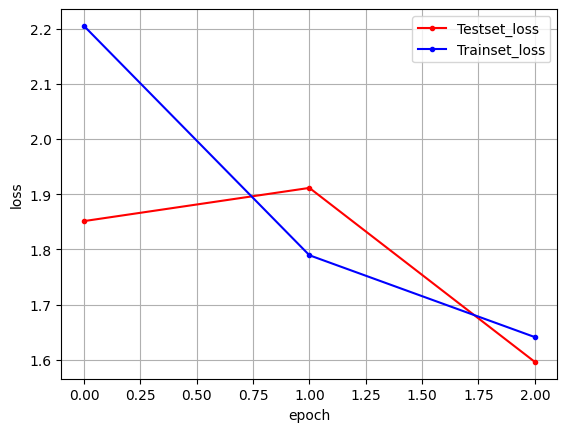

In [26]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

##  LSTM +  CNN으로 영화 리뷰 분류

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# imdb 영화 데이터
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

X_train.shape

(25000, 500)

In [35]:
# 모델
model = Sequential()
model.add(Embedding(500, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 100)         50000     
                                                                 
 dropout_4 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, None, 64)          0         
 g1D)                                                            
                                                                 
 lstm_5 (LSTM)               (None, 55)                26400     
                                                                 
 dense_6 (Dense)             (None, 1)                 56        
                                                      

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, batch_size=40, epochs=3, validation_split=0.25, callbacks=[early_stopping_callback])
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/3
469/469 [==============================] - 55s 113ms/step - loss: 0.4765 - accuracy: 0.7590 - val_loss: 0.3709 - val_accuracy: 0.8386
Epoch 2/3
469/469 [==============================] - 23s 50ms/step - loss: 0.3731 - accuracy: 0.8368 - val_loss: 0.3621 - val_accuracy: 0.8411
Epoch 3/3
782/782 [==============================] - 4s 5ms/step - loss: 0.3497 - accuracy: 0.8484

 Test Accuracy: 0.8484


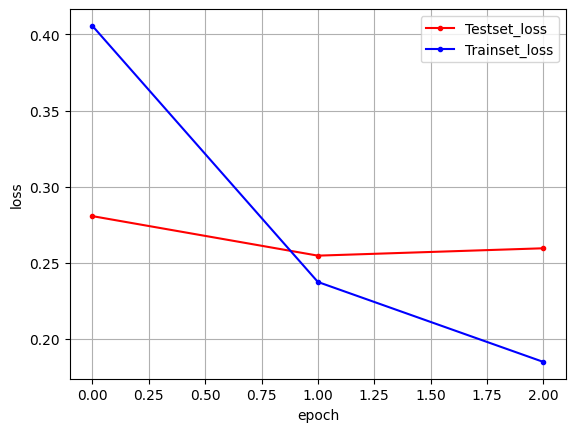

In [30]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 3. 어텐션을 사용한 신경망

In [31]:
!pip install attention

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델
model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, batch_size=40, epochs=3,  validation_data=(X_test, y_test), callbacks=[early_stopping_callback])
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/3
625/625 [==============================] - 82s 124ms/step - loss: 0.3833 - accuracy: 0.8228 - val_loss: 0.2923 - val_accuracy: 0.8801
Epoch 2/3
625/625 [==============================] - 35s 56ms/step - loss: 0.2296 - accuracy: 0.9118 - val_loss: 0.2724 - val_accuracy: 0.8885
Epoch 3/3
782/782 [==============================] - 8s 10ms/step - loss: 0.3040 - accuracy: 0.8769

 Test Accuracy: 0.8769


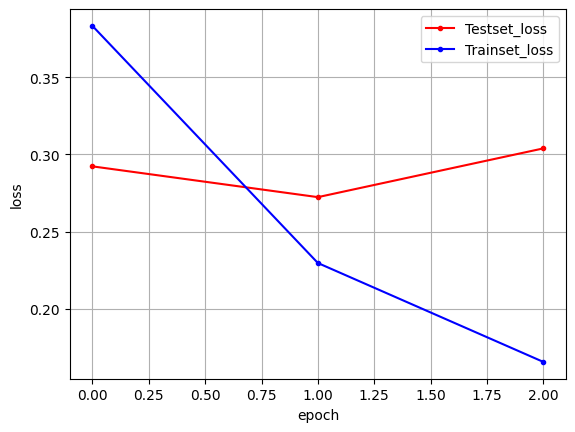

In [33]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()